In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from hiEEG_functions import *

# Load Data

In [3]:
# Load file
folder='data/hiEEG'
file_string = f'Data_Subject_{1:02d}_Session_{1:02d}'
f = h5py.File(os.path.join(folder, file_string) + '.h5', 'r')

# Load data
data, meta = load_hiEEG_data(1, 1)

# Visualize

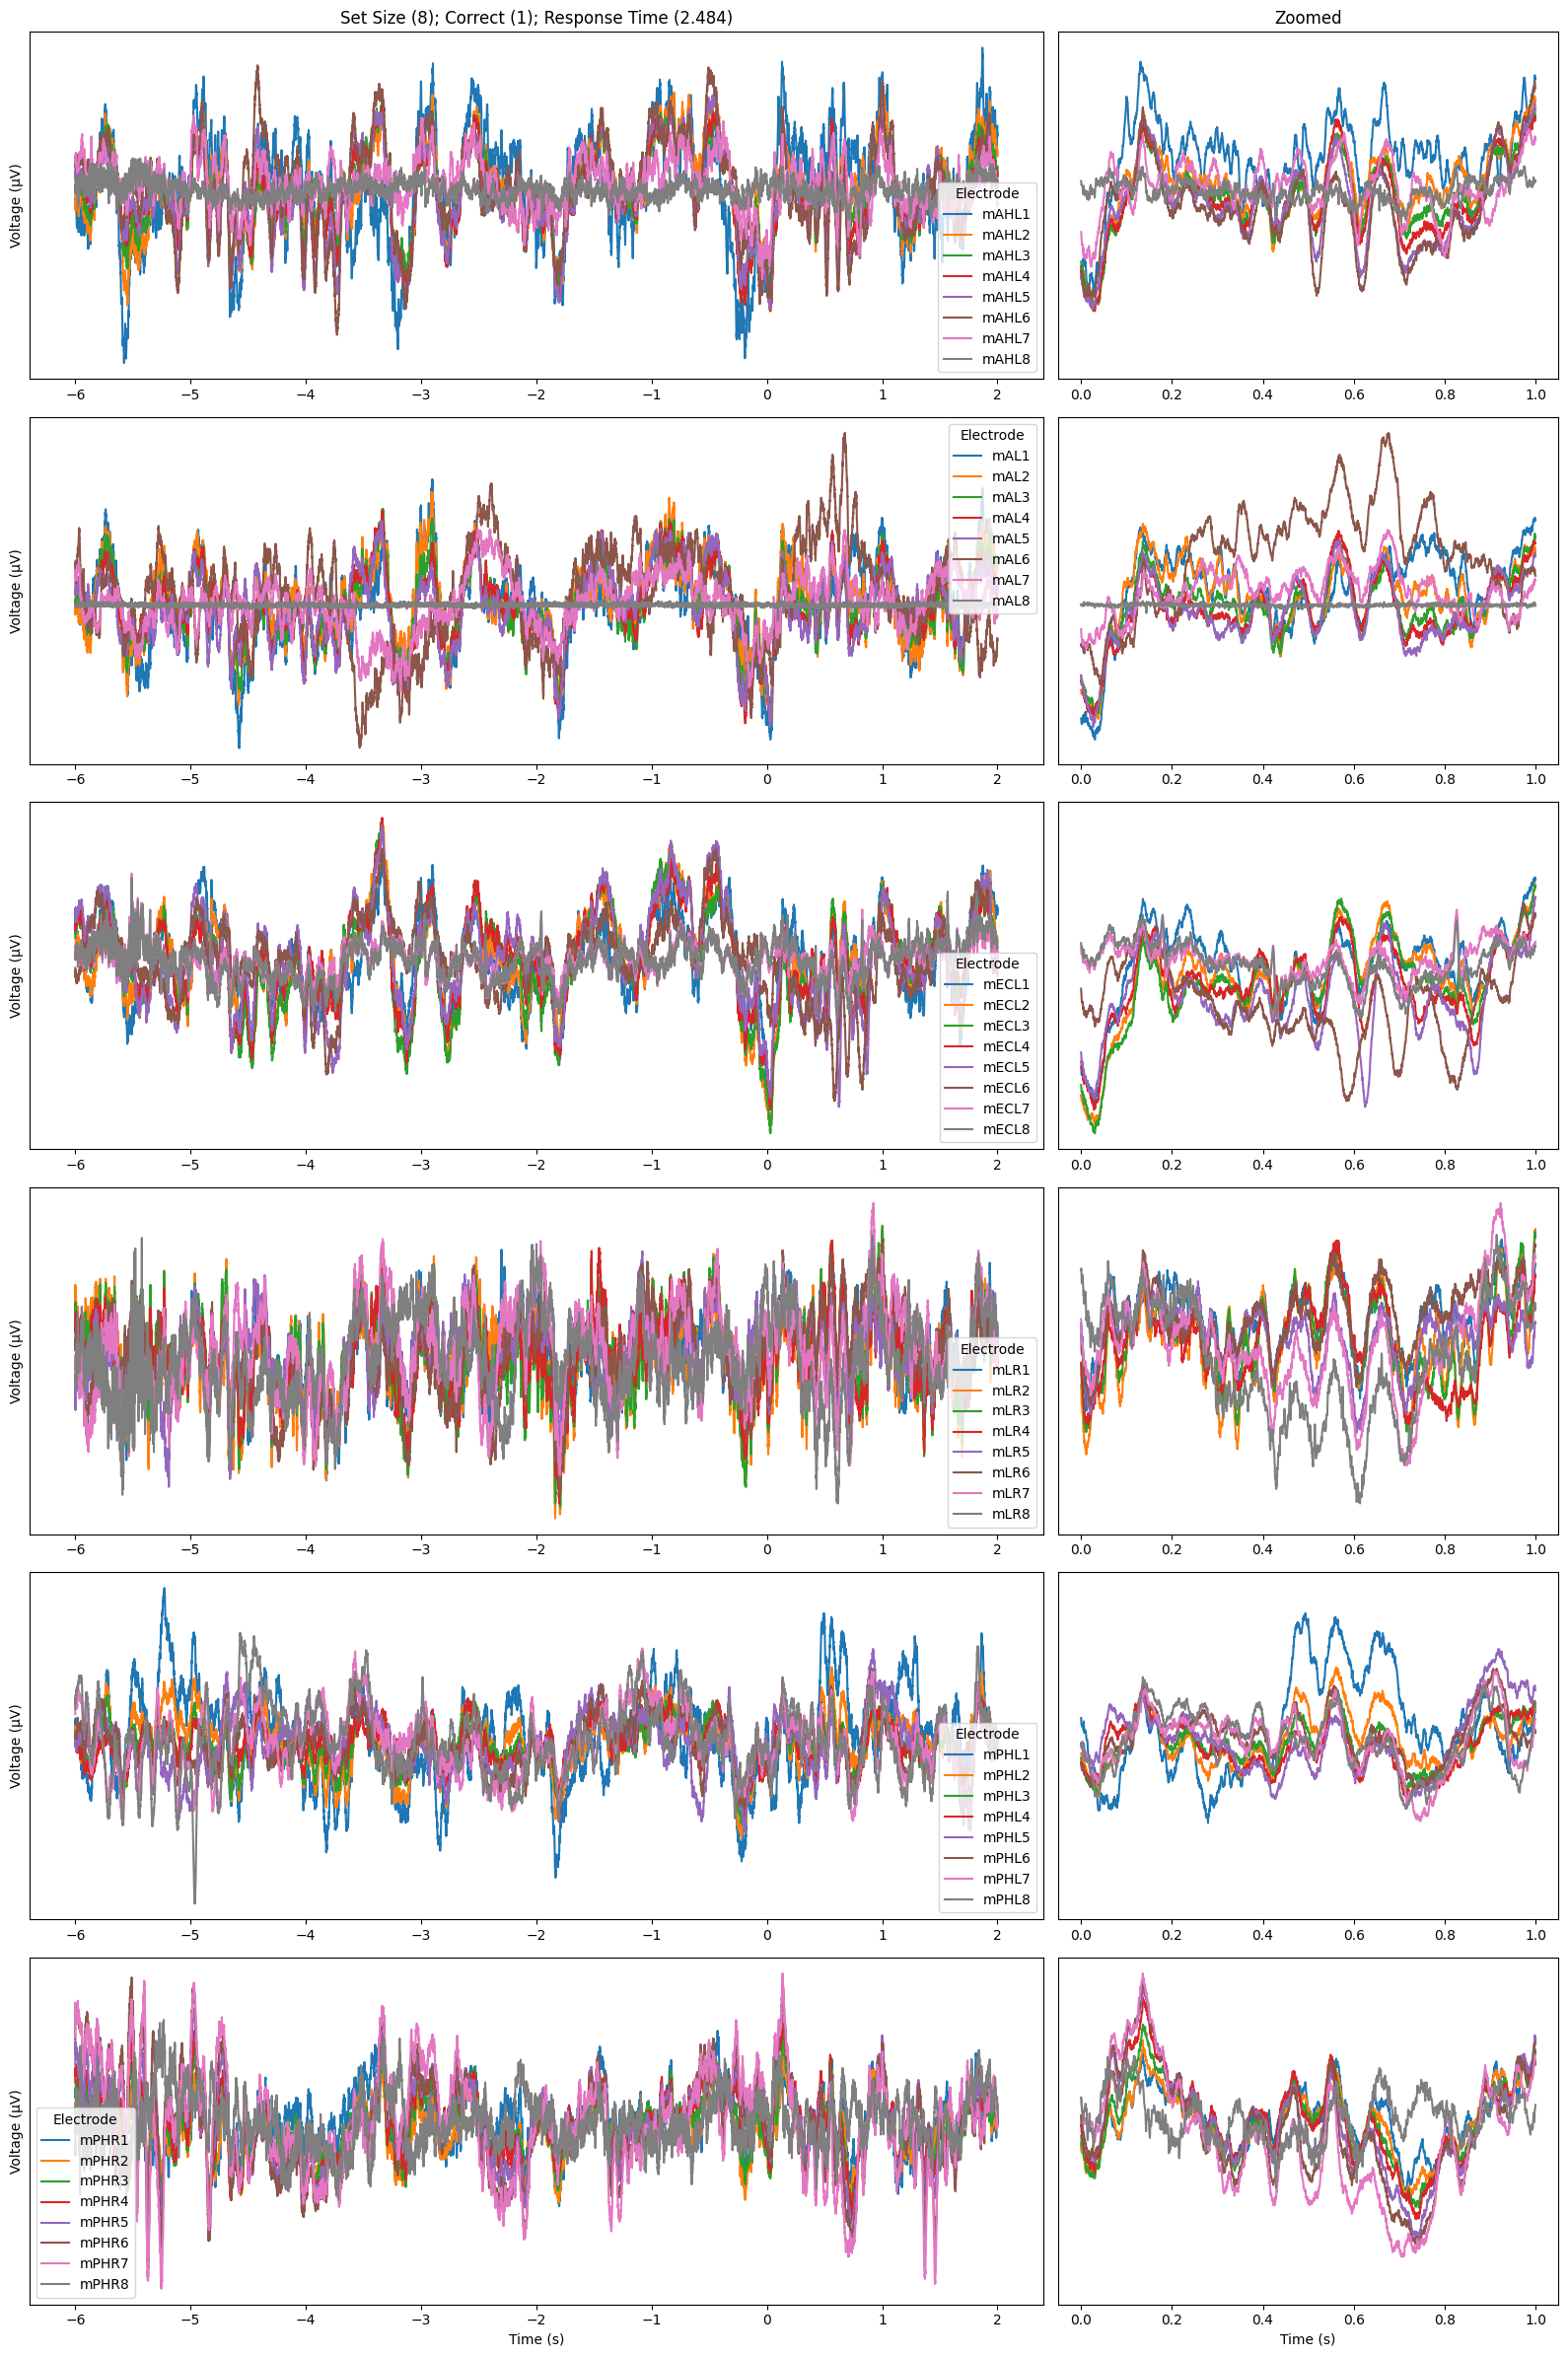

In [3]:
# TODO: Plot brain coordinates
# Set variables
trial_num = 0
time, waveform, electrode_names = data[trial_num]['time'], data[trial_num]['waveform'], data[trial_num]['electrode_names']
set_size, correct, response_time = meta[trial_num]['set_size'], meta[trial_num]['correct'], meta[trial_num]['response_time']
df = (
    pd.DataFrame(waveform, index=electrode_names, columns=time)
        .reset_index(names='Electrode')
        .melt(id_vars='Electrode', var_name='Time (s)', value_name='Voltage (μV)')
)

# Make figure
scale = 4
split = int(48/8)  # How many sections?
fig, axs = plt.subplot_mosaic([4*[i] + 2*[i+1] for i in range(0, split*2, 2)], figsize=(scale*4, scale*split))  # sharex=True
# Share x across all vertically stacked plots
[axs[i].sharex(axs[i+2]) for i in range(0, (split*2)-2, 2)]
[axs[(i+1)].sharex(axs[(i+1)+2]) for i in range(0, (split*2)-2, 2)]

# Plot
for i in range(0, split*2, 2):
    # Variables
    last = i == split*2-2

    # Filter to electrodes
    df_filtered = df.loc[df['Electrode'].map(lambda x: x in electrode_names[int(i/2*electrode_names.shape[0]/split):int((i/2+1)*electrode_names.shape[0]/split)])]

    # Regular plot
    plt.sca(axs[i])
    sns.lineplot(
        data=df_filtered,
        x='Time (s)',
        y='Voltage (μV)',
        hue='Electrode',
        ax=axs[i])
    if not last: axs[i].set_xlabel(None)
    
    # Zoomed plot
    sns.lineplot(
        data=df_filtered.loc[(df_filtered['Time (s)'] >= 0) * (df_filtered['Time (s)'] <= 1)],
        x='Time (s)',
        y='Voltage (μV)',
        hue='Electrode',
        legend=False,
        ax=axs[i+1])
    if not last: axs[i+1].set_xlabel(None)
    axs[i+1].set_ylabel(None)
    axs[i+1].set_yticks([])
    
    # Share y axis
    axs[i].sharey(axs[i+1])

    # Title based on meta
    if i == 0:
        axs[i].set_title(f'Set Size ({int(set_size):d}); Correct ({int(correct):d}); Response Time ({response_time:.3f})')
        axs[i+1].set_title('Zoomed')

# Formatting
plt.tight_layout()